In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from functions import *

# 1 Folder Data loading
The code is loading multiple CSV files from a specified folder path and converting them into pandas DataFrames.

In [170]:
folder_path = "data/e production=ep sanyo ep sanyo 002"
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

dataframes = []
dfarrnames = []

# Loop through the CSV files and load only those ending with "Format01=Kreis 5-064" and "TBA_CU"
for csv_file in csv_files:
    if "Format01=Kreis" in csv_file:
        if "TBA_CU" in csv_file:
            dfarr = pd.read_csv(csv_file, skiprows=[1])
            dfarr['Zeit'] = dfarr['Zeit'].apply(convert_to_linear_time)
            dfarr['Zeit'] = dfarr['Zeit'] - dfarr['Zeit'].iloc[0]
            dfarr['Zeit'] = dfarr['Zeit'] / 3600
            dataframes.append(dfarr)
            dfarrnames.append(csv_file)

noFiles = 0
for i, dfarr in enumerate(dataframes):
    num_rows, num_columns = dfarr.shape
    print(f"DataFrame {i + 1} - Rows: {num_rows}, Columns: {num_columns}")
    noFiles += 1
print(noFiles)

DataFrame 1 - Rows: 24697, Columns: 18
DataFrame 2 - Rows: 24345, Columns: 18
DataFrame 3 - Rows: 24937, Columns: 18
DataFrame 4 - Rows: 24891, Columns: 18
DataFrame 5 - Rows: 25275, Columns: 18
DataFrame 6 - Rows: 24968, Columns: 18
DataFrame 7 - Rows: 25748, Columns: 18
DataFrame 8 - Rows: 28881, Columns: 18
DataFrame 9 - Rows: 27547, Columns: 18
DataFrame 10 - Rows: 28306, Columns: 18
DataFrame 11 - Rows: 28828, Columns: 18
DataFrame 12 - Rows: 28577, Columns: 18
DataFrame 13 - Rows: 42219, Columns: 18
DataFrame 14 - Rows: 41616, Columns: 18
DataFrame 15 - Rows: 29388, Columns: 18
DataFrame 16 - Rows: 28592, Columns: 18
DataFrame 17 - Rows: 28947, Columns: 18
17


test that data is loaded succesfully

In [ ]:
num_rows, num_columns = dataframes[1].shape

print(f"Number of rows (length): {num_rows}")
print(f"Number of columns (width): {num_columns}")
dataframes[i].head()

### Crop The Values

In [171]:
filtered_dataframes = []

for df in dataframes:
    schritt_mask = ((df['Schritt'] == 4) | (df['Schritt'] == 5)) & (df['Zeit'] >= 10)
    start_index = df[schritt_mask]
    start_time = start_index.iloc[0]['Zeit']
    end_time = start_time + 4
    print(start_index.iloc[0]['Zeit'])

    time_mask = (df['Zeit'] >= start_time) & (df['Zeit'] <= end_time) & ((df['Schritt'] == 4) | (df['Schritt'] == 5))

    filtered_df = df[time_mask]
    filtered_dataframes.append(filtered_df)

16.52070277776983
15.856586111121707
16.894836111134953
16.468813888894186
16.836875
16.358380555576748
16.830375000039737
21.35154166665342
19.77004444440206
21.35131111111906
21.54587222225136
19.6800916667117
19.599916666679913
18.830625
18.787350000010598
17.70070555554496
18.55334166665872


### Plot all data from folder
The code snippet is defining a list `columns_to_plot` which contains the column numbers (indices) of the columns to be plotted. It then iterates over a list of dataframes (`dataframes`) and for each dataframe, it prints the graph number, calls a function `plot_threshold` passing the `columns_to_plot`, the current dataframe, and two threshold values start and end time as arguments. The variable `I` is used as a counter to keep track of the graph number.

Graph No. : 0
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-01-16 070821=TBA_CU=TS010903  Format01=Kreis 5-064.csv


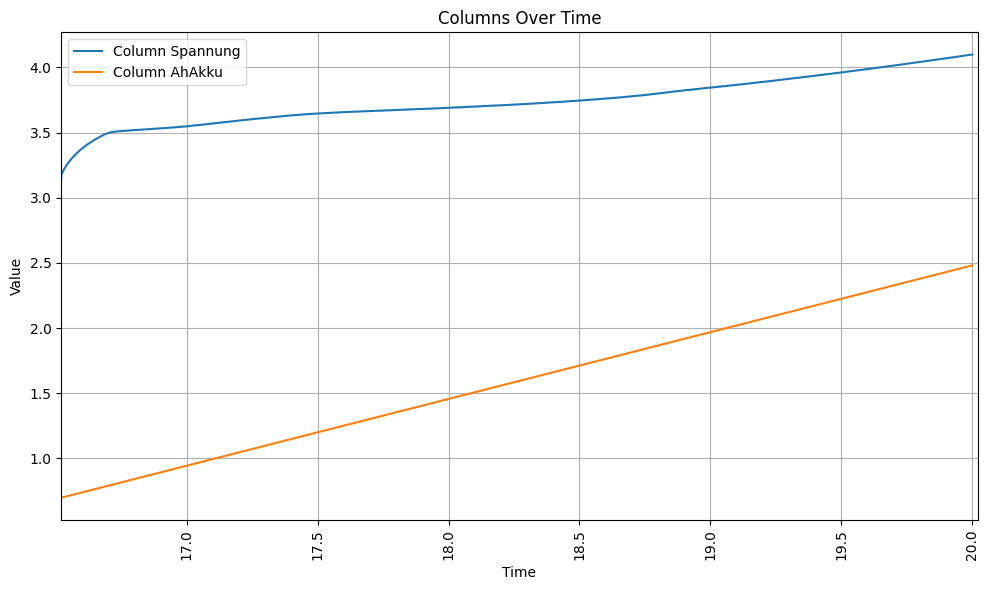

Graph No. : 1
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-02-04 024752=TBA_CU=TS011765  Format01=Kreis 5-064.csv


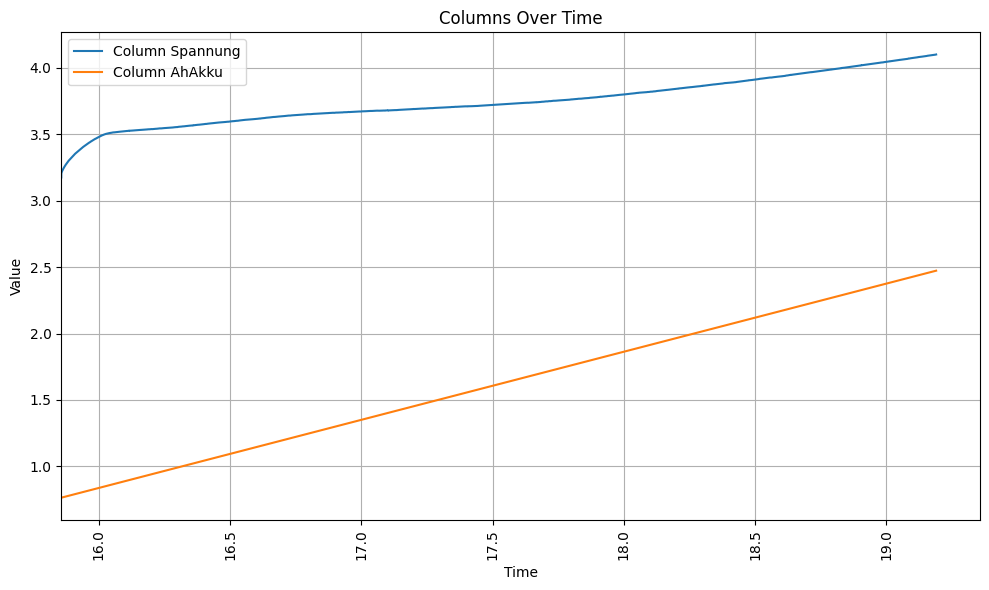

Graph No. : 2
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-02-13 011029=TBA_CUv2=TS012203  Format01=Kreis 5-064.csv


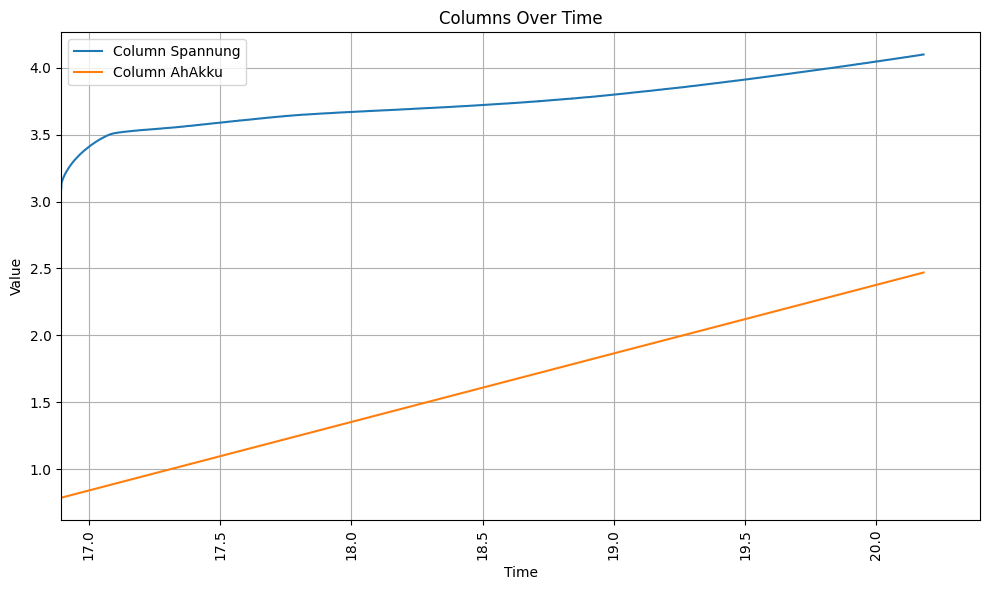

Graph No. : 3
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-02-21 134126=TBA_CUv2=TS012700  Format01=Kreis 5-064.csv


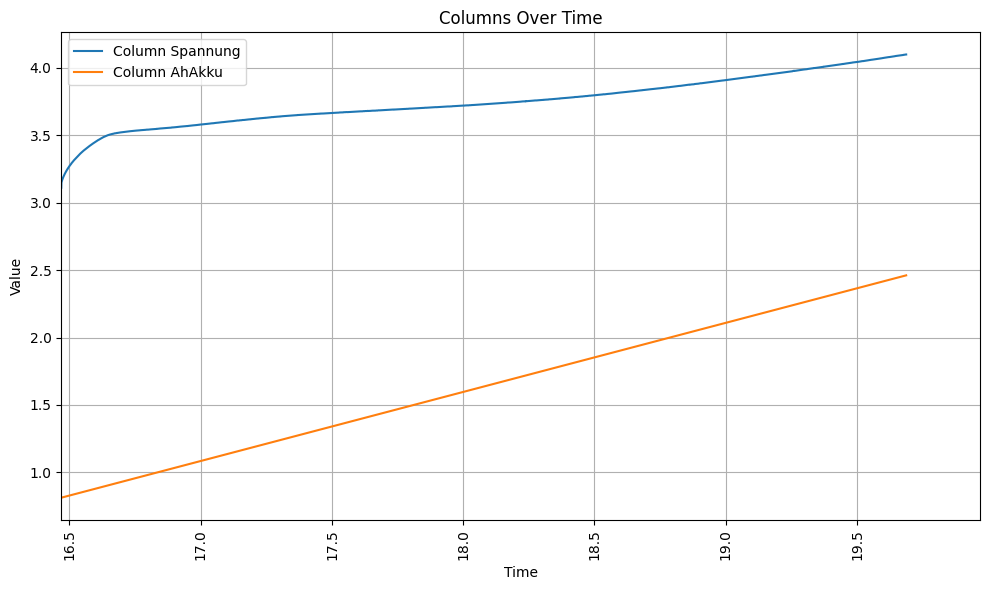

Graph No. : 4
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-03-02 105805=TBA_CUv2=TS013139  Format01=Kreis 5-064.csv


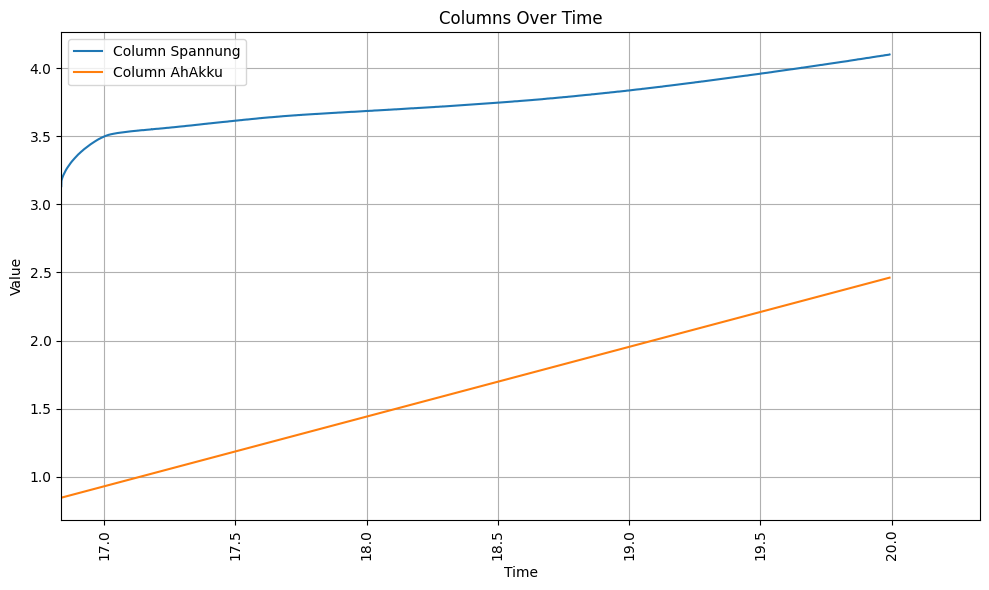

Graph No. : 5
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-03-04 105953=TBA_CUv2=TS013217  Format01=Kreis 5-064.csv


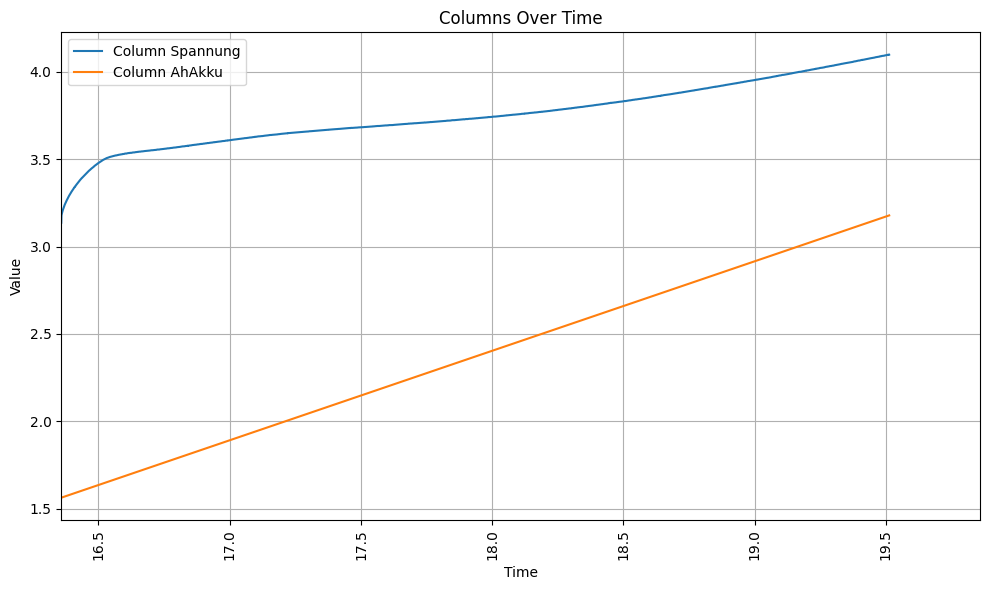

Graph No. : 6
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-03-13 130326=TBA_CUv2=TS013737  Format01=Kreis 5-064.csv


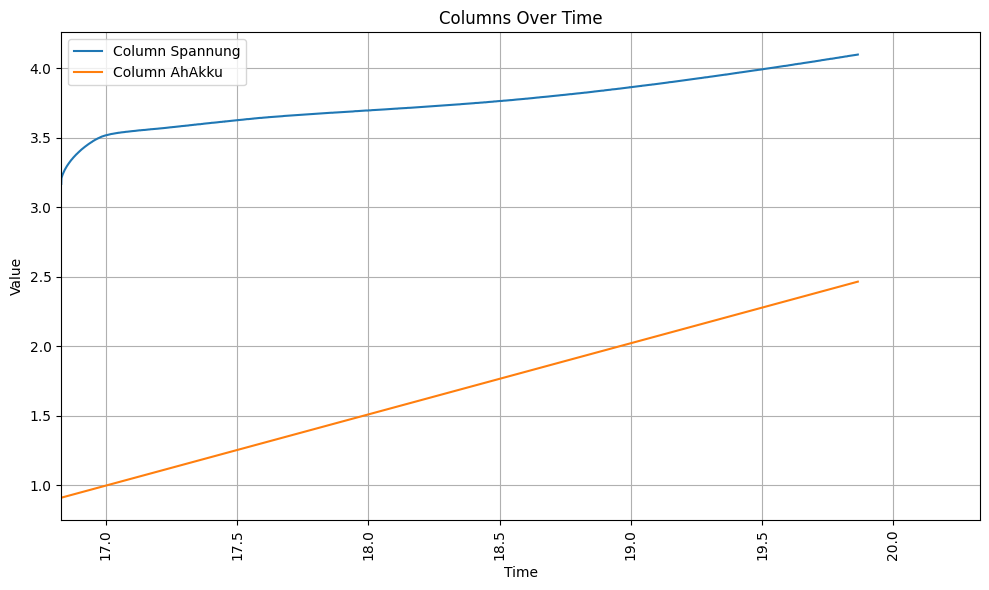

Graph No. : 7
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-03-24 115408=TBA_CUv2=TS014406  Format01=Kreis 5-064.csv


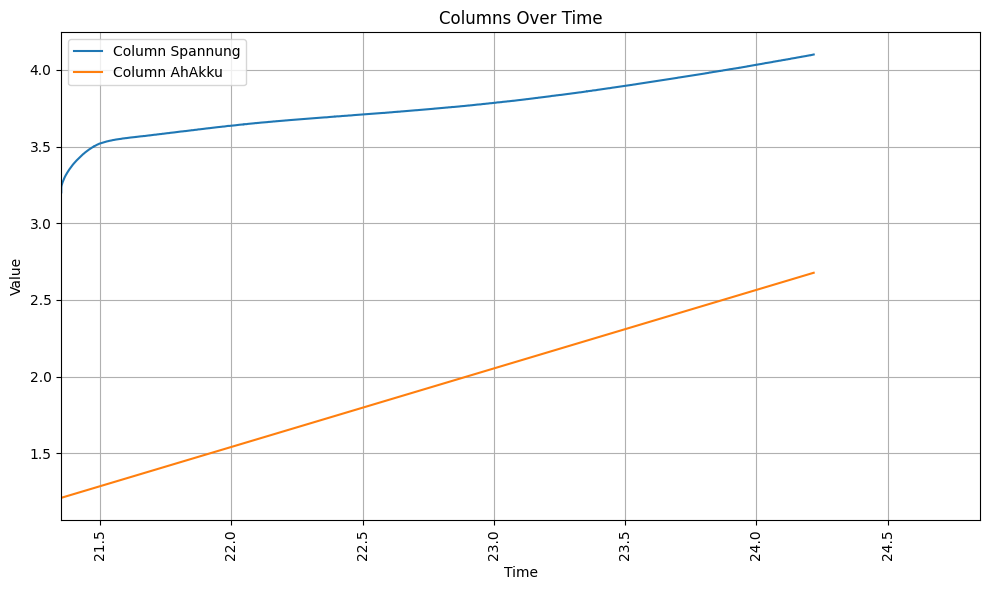

Graph No. : 8
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-04-02 093425=TBA_CUv2=TS014816  Format01=Kreis 5-064.csv


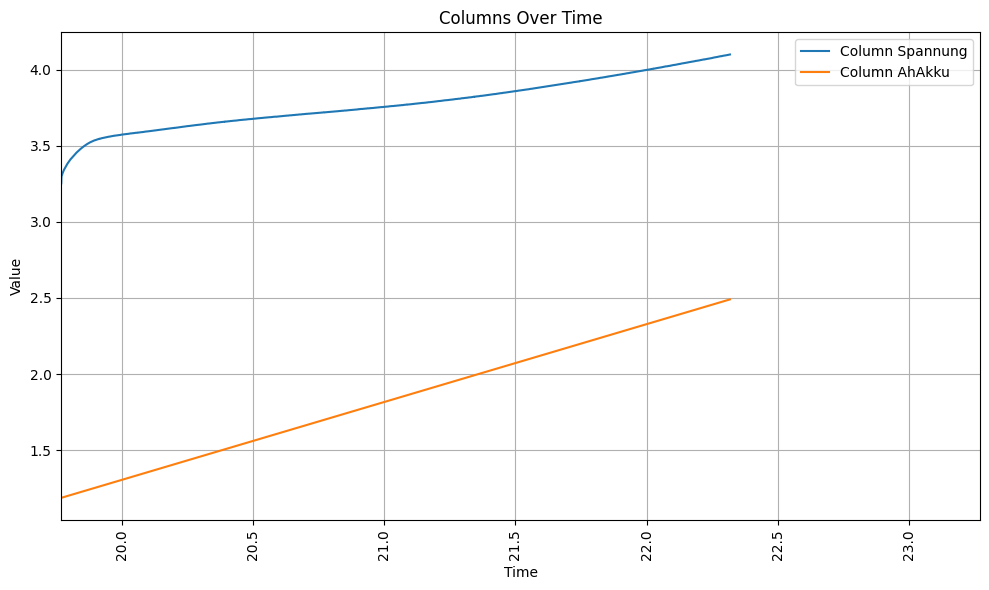

Graph No. : 9
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-04-11 085128=TBA_CUv2=TS015275  Format01=Kreis 5-064.csv


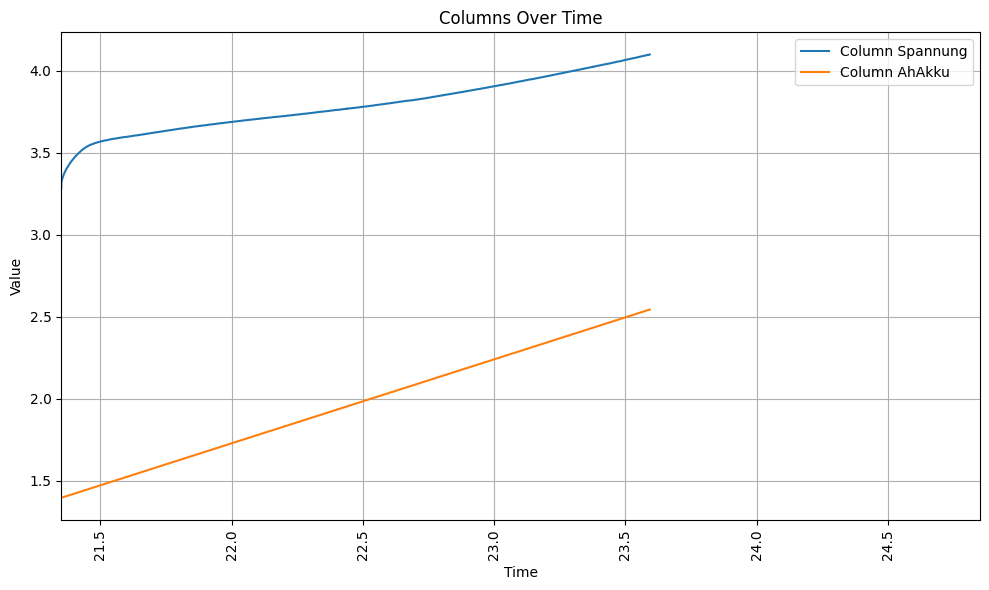

Graph No. : 10
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-04-20 093647=TBA_CUv2=TS015937  Format01=Kreis 5-064.csv


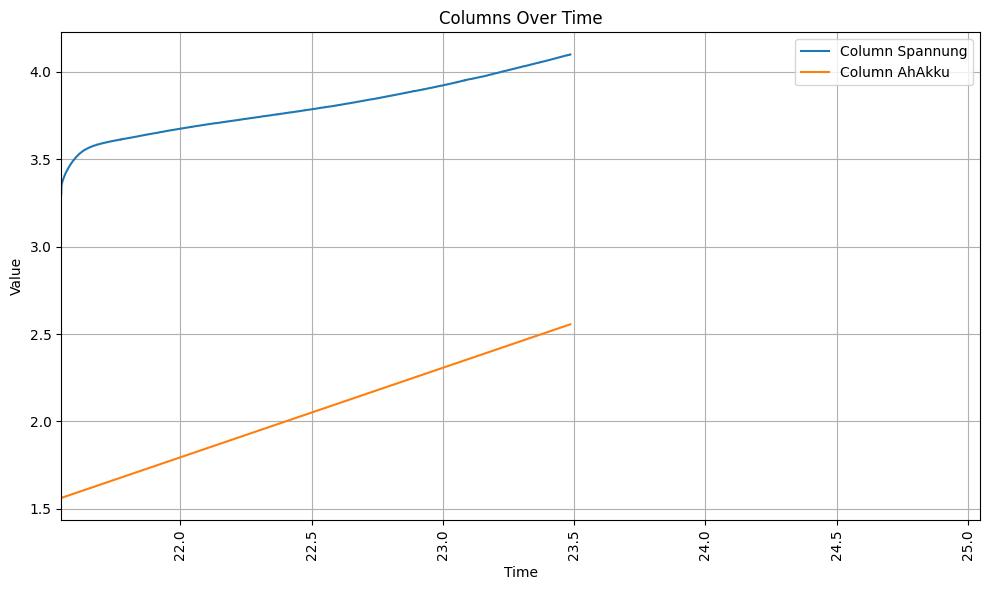

Graph No. : 11
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-04-29 094510=TBA_CUv2=TS016442  Format01=Kreis 5-064.csv


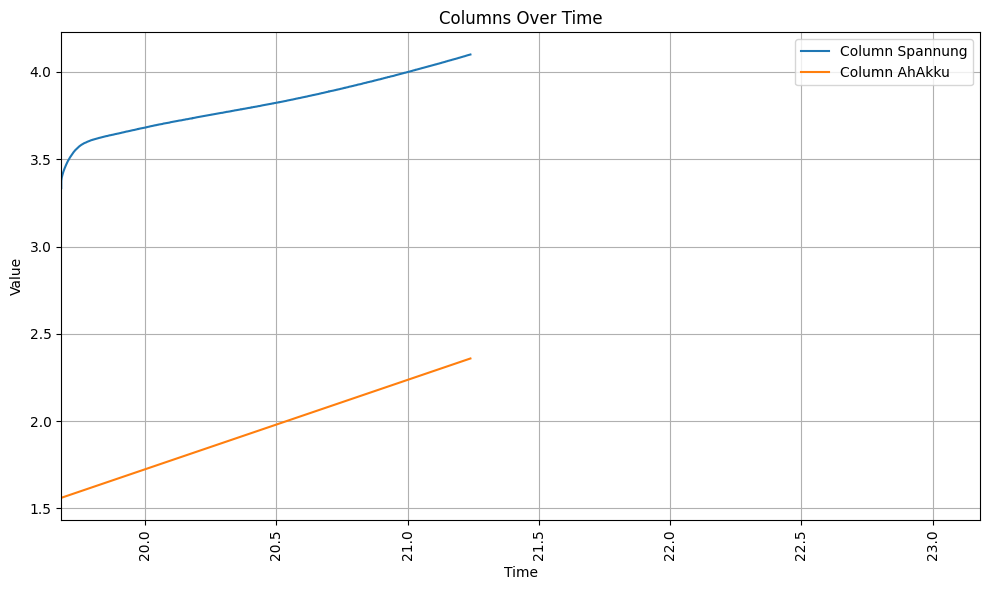

Graph No. : 12
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-05-08 091310=TBA_CUv2=TS016945  Format01=Kreis 5-064.csv


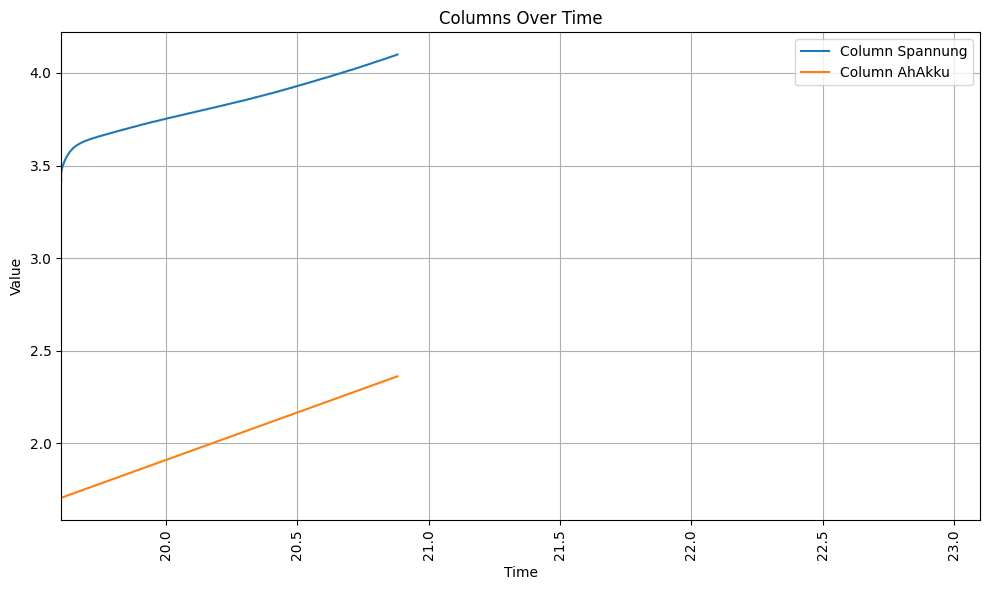

Graph No. : 13
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-05-17 194126=TBA_CUv2=TS017499  Format01=Kreis 5-064.csv


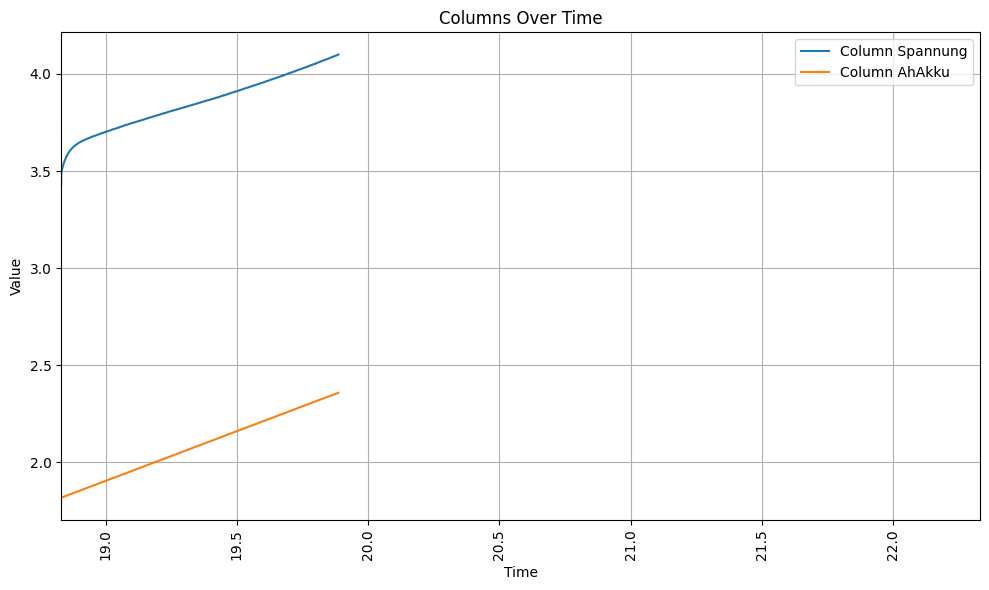

Graph No. : 14
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-05-28 011137=TBA_CUv2=TS017939  Format01=Kreis 5-064.csv


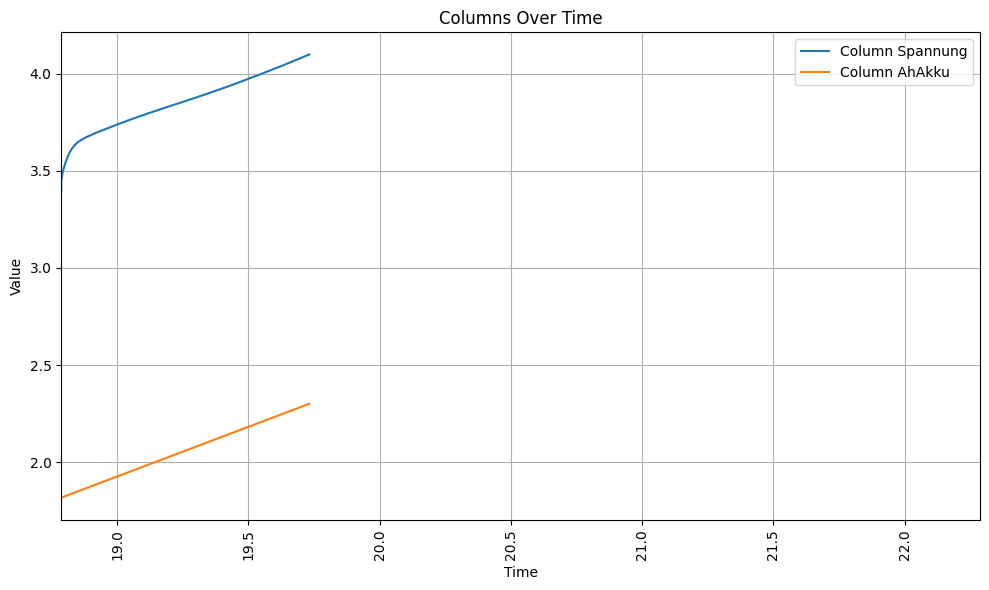

Graph No. : 15
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-06-06 082834=TBA_CUv2=TS018457  Format01=Kreis 5-064.csv


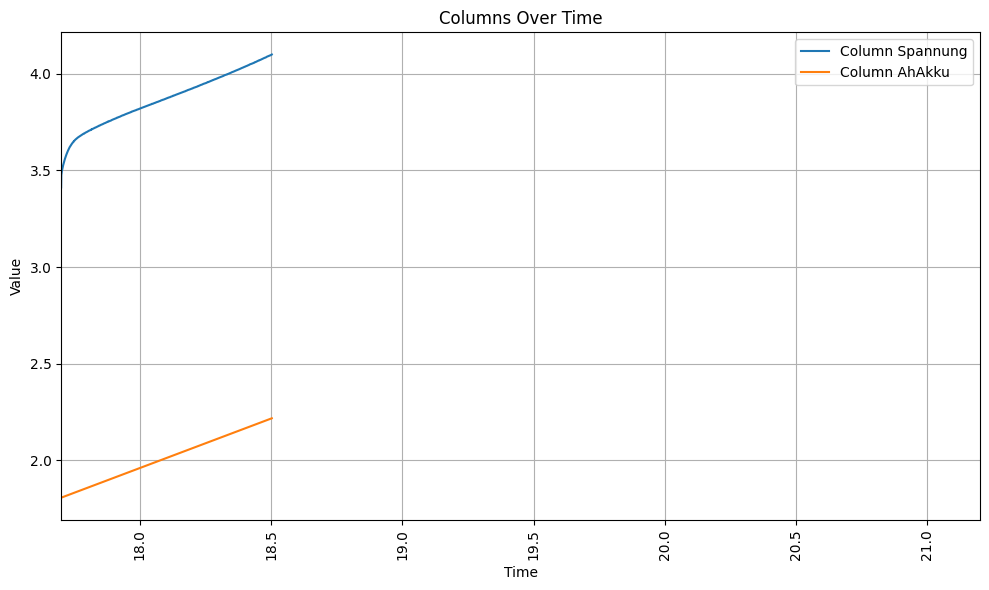

Graph No. : 16
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-06-13 195739=TBA_CUv2=TS018886  Format01=Kreis 5-064.csv


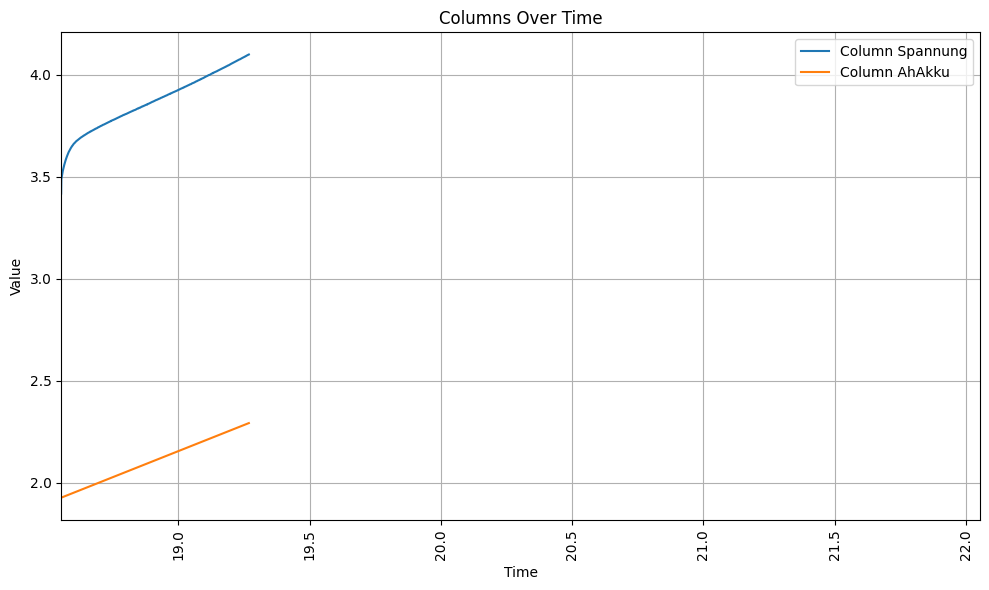

In [172]:
columns_to_plot = [15,9] 
I = 0
for i in dataframes:
    print("Graph No. :",I)
    print(dfarrnames[I])
    start_time = filtered_dataframes[I].iloc[0]['Zeit']
    plot_threshold(columns_to_plot, filtered_dataframes[I],start_time,start_time+3.5)
    I=I+1

# 2 Capacity Analysis
### Max Min Value extration
this code is extracting the `maximun` and `minimum` value between the start and end time for all files in folder.It also captures the capacity using `capacity = max - min` and store the data in the array.  

In [173]:
columns_to_plot = [9]

max_values_list = []
min_values_list = []
capacity_values_list = []
iteration_range = range(len(dataframes))

for df in filtered_dataframes:
    max_values = max_threshold(columns_to_plot, df, 0, 35)
    min_values = min_threshold(columns_to_plot, df, 0, 35)
    
    max_values_list .append(max_values)
    min_values_list.append(min_values)
    capacity = max_values[0]-min_values[0]
    capacity_values_list.append(capacity)

print(max_values_list)
print(min_values_list)
print(capacity_values_list)
print(iteration_range)

[[2.481514860788593], [2.472827938618138], [2.469068053371302], [2.461601599225105], [2.461496691717912], [3.178800380042958], [2.464982704310387], [2.677504953422613], [2.490492819422798], [2.543365841105697], [2.555472569412814], [2.359027004342352], [2.36111429957964], [2.358234026552964], [2.300535767259134], [2.218016392947902], [2.291669150410598]]
[[0.698714602887776], [0.7646620331606755], [0.7856070096895564], [0.8125349584051946], [0.8460636535046433], [1.562708852767173], [0.9101984712424382], [1.210751952856299], [1.186888863860077], [1.394844828439091], [1.561829034268158], [1.561155348696047], [1.704860173138513], [1.817835484907846], [1.816898196890179], [1.807353934371349], [1.925744398809911]]
[1.782800257900817, 1.7081659054574625, 1.6834610436817457, 1.6490666408199104, 1.615433038213269, 1.6160915272757848, 1.5547842330679487, 1.466753000566314, 1.3036039555627212, 1.1485210126666061, 0.9936435351446562, 0.797871655646305, 0.656254126441127, 0.5403985416451182, 0.48

### Extract Requried data
`skip_indeces` are thoese which is creating problem in graph

In [174]:
skip_indices = [11]

extracted_capacity_values = [value for i, value in enumerate(capacity_values_list) if i not in skip_indices]

iteration_range = range(len(extracted_capacity_values))

print(extracted_capacity_values)
print(iteration_range)

[1.782800257900817, 1.7081659054574625, 1.6834610436817457, 1.6490666408199104, 1.615433038213269, 1.6160915272757848, 1.5547842330679487, 1.466753000566314, 1.3036039555627212, 1.1485210126666061, 0.9936435351446562, 0.656254126441127, 0.5403985416451182, 0.48363757036895505, 0.41066245857655326, 0.36592475160068694]
range(0, 16)


### ploting the capacity
It plot the capacity over days asuming that the each file in the folder is of one day.

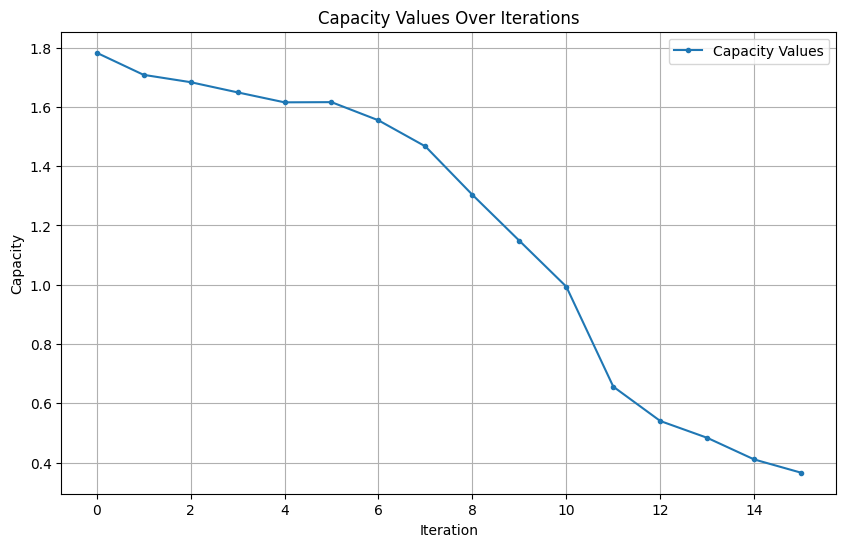

In [175]:
plt.figure(figsize=(10, 6))
plt.plot(iteration_range, extracted_capacity_values, label='Capacity Values', marker='.')
plt.xlabel('Iteration')
plt.ylabel('Capacity')
plt.legend()
plt.title('Capacity Values Over Iterations')
plt.grid(True)

plt.show()

### Save the graph data
this code is saving the data of the graphs for later use 
how to use
-  If you are using it first time  clear the data in `extracted_capacity_values.csv`
- first get your desired output on the above graph
- run this code only once
- it will store it in csv that you can later use to display all graphs at one

In [ ]:
csv_filename = "extracted_capacity_values_2.csv"

with open(csv_filename, 'a', newline='') as csvfile:
    values_as_string = ",".join(map(str, extracted_capacity_values))
    csvfile.write(values_as_string + "\n")

print(f"Values have been appended to the CSV file '{csv_filename}'")

### Ploting all Cell Data
This will take csv of the above code block and plot all the data that is stored aleady

In [ ]:
csv_file = 'extracted_capacity_values_2.csv'

csvdf = pd.read_csv(csv_file, header=None)

num_rows, num_columns = csvdf.shape

for row in range(num_rows):
    plt.plot(csvdf.iloc[row], label=f'Cell {row + 1}')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

plt.show()

# 3 Volatge Charging analysis

### Ploting Voltage
`data_extract` is the array of `(dataframe,starttime)`
- `starttime` is  the that you will place manully by using data above code output
- try to use first most value of the repected data frame if it is not working use the last one or randomly
- you can look above 35 graphs to figure out the proper value of  `starttime`
- `dataframe` is the correct that you want to include in the ploting 

Skipping index:  11


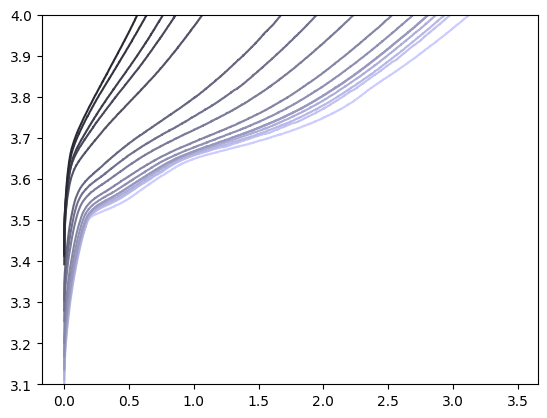

In [176]:
columns_to_plot = [15] 

plt1 = plt
i=0

for i,dataframe in enumerate(filtered_dataframes):
    if i not in skip_indices:
        start_time = filtered_dataframes[i].iloc[0]['Zeit']
        plot_threshold_same_plot(columns_to_plot, filtered_dataframes[i], start_time, start_time+4, plt1, y_min=3.1, y_max=4,i=i)
    else:
        print("Skipping index: ",i)
i=i+1

plt1.show()

### Croping Data

In [ ]:
import os
import csv

output_directory = "extracted_data"
os.makedirs(output_directory, exist_ok=True)

In [178]:
min_time = 3.1
max_time = 3.9
time_interval = 0.1

for current_time in np.arange(min_time, max_time + time_interval, time_interval):
    csv_filename = os.path.join(output_directory, f"extracted_voltage_data_{current_time:.1f}.csv")

    I = 0
    for index, dataframe in enumerate(filtered_dataframes):
        if index in skip_indices:
            print(f"Skipping index: {index}")
            continue

        voltage = []
        voltage = dataframe['Spannung']
        voltage_mask = (dataframe['Spannung'] >= current_time) & (dataframe['Spannung'] <= current_time + time_interval)
        voltage = voltage[voltage_mask]
        voltage = voltage.to_numpy()

        if not voltage.size:
            continue

        voltage_range = np.linspace(voltage.min(), voltage.max(), num=50)

        data =[]

        data = {'Spannung{}'.format(i + 1): value for i, value in enumerate(voltage_range)}
        data['Max_Capacity'] = max_values_list[I][0]
        data['Capacity'] = capacity_values_list[I]


        with open(csv_filename, 'a', newline='') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=data.keys())
            #if index == 0:
            #    writer.writeheader()
            writer.writerow(data)

        I += 1

    print(f"Saved CSV file: {csv_filename}")

Skipping index: 11
Saved CSV file: extracted_data\extracted_voltage_data_3.1.csv
Skipping index: 11
Saved CSV file: extracted_data\extracted_voltage_data_3.2.csv
Skipping index: 11
Saved CSV file: extracted_data\extracted_voltage_data_3.3.csv
Skipping index: 11
Saved CSV file: extracted_data\extracted_voltage_data_3.4.csv
Skipping index: 11
Saved CSV file: extracted_data\extracted_voltage_data_3.5.csv
Skipping index: 11
Saved CSV file: extracted_data\extracted_voltage_data_3.6.csv
Skipping index: 11
Saved CSV file: extracted_data\extracted_voltage_data_3.7.csv
Skipping index: 11
Saved CSV file: extracted_data\extracted_voltage_data_3.8.csv
Skipping index: 11
Saved CSV file: extracted_data\extracted_voltage_data_3.9.csv
